In [ ]:
# Install the necessary dependencies

import os
import sys 
!{sys.executable} -m pip install --quiet pandas scikit-learn numpy matplotlib jupyterlab_myst ipython imageio scikit-image requests
# Convolutional Neural Networks

---
license:
    code: MIT
    content: CC-BY-4.0
github: https://github.com/ocademy-ai/machine-learning
venue: By Ocademy
open_access: true
bibliography:
  - https://raw.githubusercontent.com/ocademy-ai/machine-learning/main/open-machine-learning-jupyter-book/references.bib
---

# Convolutional Neural Networks

Convolutional Neural Networks (CNNs) are responsible for the latest major breakthroughs in image recognition in the past few years.

In mathematics, a convolution is a function that is applied over the output of another function. In our case, we will consider applying a matrix multiplication (filter) across an image. See the below diagram for an example of how this may work.

<img src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/deep-learning/CNN/01_intro_cnn.png" width="90%" class="bg-white mb-1">

In [2]:
from IPython.display import HTML
display(HTML("""
<p style="text-align: center;">
<iframe src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/html/conv-demo/index.html" width="105%" height="800px;"
style="border:none;" scrolling="auto"></iframe>
A demo of convolution function. <a
href="https://cs231n.github.io/convolutional-networks/"> [source]</a>
</p>
"""))

CNNs generally follow a structure. The main convolutional setup is (input array) -> (convolutional filter layer) -> (Pooling) -> (Activation layer). The above diagram depicts how a convolutional layer may create one feature. Generally, filters are multidimensional and end up creating many features. It is also common to have a completely separate filter-feature creator of different sizes acting on the same layer. After this convolutional filter, it is common to apply a pooling layer. This pooling may be a max-pooling or an average pooling or another aggregation. One of the key concepts here is that the pooling layer has no parameters while decreasing the layer size. See the below diagram for an example of max-pooling.

<img src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/deep-learning/CNN/01_intro_cnn2.png" width="90%" class="bg-white mb-1">

After the max pooling, there is generally an activation layer. One of the more common activation layers is the ReLU (Rectified Linear Unit).

## MNIST handwritten digits

Here we illustrate how to use a simple CNN with three convolutional units to predict the MNIST handwritten digits. 

```{note}
There is good reason why this dataset is used like the 'hello world' of image recognition, it is fairly compact while having a decent amount of training, test, and validation data. It only has one channel (black and white) and only ten possible outputs (0-9).
```

When the script is done training the model, you should see similar output to the following graphs.

<img src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/deep-learning/CNN/02_cnn1_loss_acc.png" width="90%" class="bg-white mb-1">

Training and test loss (left) and test batch accuracy (right).

<img src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/deep-learning/CNN/02_cnn1_mnist_output.png" width="90%" class="bg-white mb-1">

A random set of 6 digits with actual and predicted labels. You can see a prediction failure in the lower right box.


In [3]:
from IPython.display import HTML
display(HTML("""
<p style="text-align: center;">
<iframe src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/html/cnn-vis/cnn.html" width="105%" height="800px;"
style="border:none;" scrolling="auto"></iframe>
A demo of CNN. <a
href="https://adamharley.com/nn_vis/cnn/3d.html"> [source]</a>
</p>
"""))

In [9]:
from IPython.display import HTML
display(HTML("""
<p style="text-align: center;">
<iframe src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/html/cnn-vis-3/index.html" width="105%" height="600px;"
style="border:none;" scrolling="auto"></iframe>
A demo of CNN. <a
href="https://poloclub.github.io/cnn-explainer/"> [source]</a>
</p>
"""))

In [4]:
from IPython.display import HTML
display(HTML("""
<p style="text-align: center;">
<iframe src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/html/cnn-vis-2/index.html" width="105%" height="600px;"
style="border:none;" scrolling="auto"></iframe>
A demo of CNN. <a
href="https://poloclub.github.io/cnn-explainer/"> [source]</a>
</p>
"""))

### Code

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.1342 - accuracy: 0.9595 - val_loss: 0.0571 - val_accuracy: 0.9814
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0443 - accuracy: 0.9864 - val_loss: 0.0362 - val_accuracy: 0.9882
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0301 - accuracy: 0.9907 - val_loss: 0.0311 - val_accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0255 - val_accuracy: 0.9909
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.0283 - val_accuracy: 0.9906
313/313 - 0s - loss: 0.0283 - accuracy: 0.9906 - 338ms/epoch - 1ms/step
Test accuracy: 0.9905999898910522


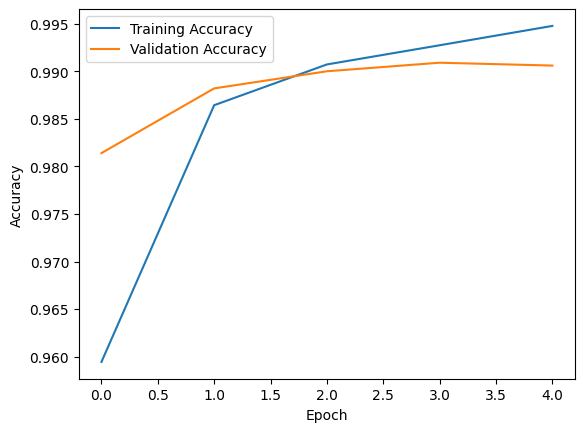

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data preprocessing
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compiler model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Test model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

# Visualizing the training process
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Generation # 5. Train Loss: 2.28. Train Acc (Test Acc): 11.00% (13.20%)
Generation # 10. Train Loss: 2.28. Train Acc (Test Acc): 13.00% (17.40%)
Generation # 15. Train Loss: 2.26. Train Acc (Test Acc): 26.00% (31.80%)
Generation # 20. Train Loss: 2.22. Train Acc (Test Acc): 30.00% (39.40%)
Generation # 25. Train Loss: 2.16. Train Acc (Test Acc): 44.00% (42.60%)
Generation # 30. Train Loss: 2.16. Train Acc (Test Acc): 36.00% (49.60%)
Generation # 35. Train Loss: 2.11. Train Acc (Test Acc): 52.00% (56.20%)
Generation # 40. Train Loss: 2.01. Train Acc (Test Acc): 51.00% (52.60%)
Generation # 45. Train Loss: 1.88. Train Acc (Test Acc): 58.00% (59.40%)
Generation # 50. Train Loss: 1.67. Train Acc (Test Acc): 61.00% (63.00%)
Generation # 55. Train Loss: 1.63. Train Acc (Test Acc): 57.00% (63.60%)
Generation # 60. Train Loss: 1.25. Train Acc (Test Acc): 69.00% (69.20%)
Generation # 65. Train Loss: 1.12. Train Acc (Test Acc): 71.00% (68.00%)
Generation # 70. Train Loss: 0.83. Train Acc (Test A

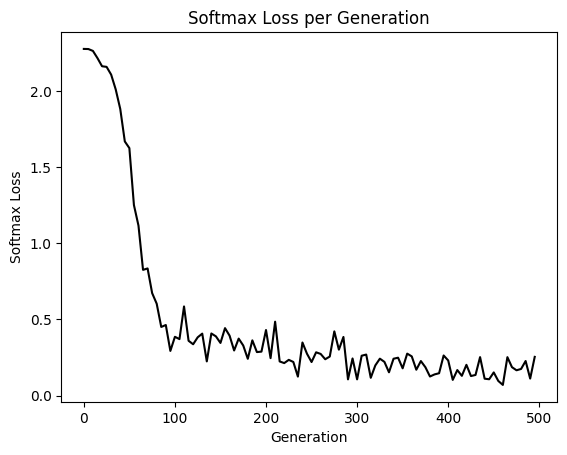

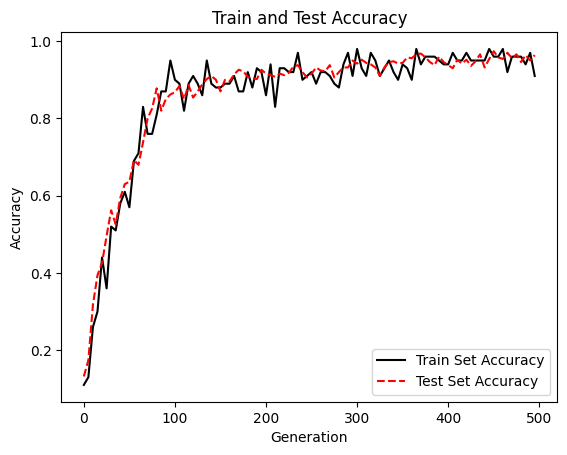

1/1 [==============================] - 0s 97ms/step


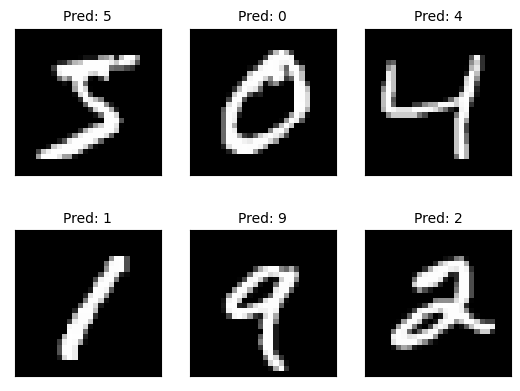

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert images to 4D tensors (batch_size, height, width, channels)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Set model parameters
batch_size = 100
learning_rate = 0.005
evaluation_size = 500
image_width = train_images.shape[1]
image_height = train_images.shape[2]
target_size = np.max(train_labels) + 1
num_channels = 1  # greyscale = 1 channel
generations = 500
eval_every = 5
conv1_features = 25
conv2_features = 50
max_pool_size1 = 2  # NxN window for 1st max pool layer
max_pool_size2 = 2  # NxN window for 2nd max pool layer
fully_connected_size1 = 100

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(conv1_features, (4, 4), activation='relu', input_shape=(image_width, image_height, num_channels)),
    tf.keras.layers.MaxPooling2D((max_pool_size1, max_pool_size1)),
    tf.keras.layers.Conv2D(conv2_features, (4, 4), activation='relu'),
    tf.keras.layers.MaxPooling2D((max_pool_size2, max_pool_size2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(fully_connected_size1, activation='relu'),
    tf.keras.layers.Dense(target_size)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
train_loss = []
train_acc = []
test_acc = []
for i in range(generations):
    rand_index = np.random.choice(len(train_images), size=batch_size)
    rand_x = train_images[rand_index]
    rand_y = train_labels[rand_index]
    
    history = model.train_on_batch(rand_x, rand_y)
    temp_train_loss, temp_train_acc = history[0], history[1]
    
    if (i+1) % eval_every == 0:
        eval_index = np.random.choice(len(test_images), size=evaluation_size)
        eval_x = test_images[eval_index]
        eval_y = test_labels[eval_index]
        
        test_loss, temp_test_acc = model.evaluate(eval_x, eval_y, verbose=0)
        
        # Record and print results
        train_loss.append(temp_train_loss)
        train_acc.append(temp_train_acc)
        test_acc.append(temp_test_acc)
        acc_and_loss = [(i+1), temp_train_loss, temp_train_acc * 100, temp_test_acc * 100]
        acc_and_loss = [np.round(x, 2) for x in acc_and_loss]
        print('Generation # {}. Train Loss: {:.2f}. Train Acc (Test Acc): {:.2f}% ({:.2f}%)'.format(*acc_and_loss))

# Plot loss over time
plt.plot(range(0, generations, eval_every), train_loss, 'k-')
plt.title('Softmax Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Softmax Loss')
plt.show()

# Plot train and test accuracy
plt.plot(range(0, generations, eval_every), train_acc, 'k-', label='Train Set Accuracy')
plt.plot(range(0, generations, eval_every), test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot some samples
# Plot the 6 of the last batch results:
predictions = model.predict(train_images[:6])
predictions = np.argmax(predictions, axis=1)
images = np.squeeze(train_images[:6])

Nrows = 2
Ncols = 3
for i in range(6):
    plt.subplot(Nrows, Ncols, i+1)
    plt.imshow(np.reshape(images[i], [28, 28]), cmap='Greys_r')
    plt.title('Pred: ' + str(predictions[i]), fontsize=10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
plt.show()

## CIFAR-10

Here we will build a convolutional neural network to predict the `CIFAR-10` data.

The script provided will download and unzip the `CIFAR-10` data. Then it will start training a CNN from scratch. You should see similar output at the end of the following two graphs.

<img src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/deep-learning/CNN/03_cnn2_loss_acc.png" width="90%" class="bg-white mb-1">

Here we see the training loss (left) and the test batch accuracy (right).

### Code

In [7]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import urllib.request

# Set model parameters
batch_size = 128
data_dir = 'temp'
output_every = 50
generations = 20000
eval_every = 500
image_height = 32
image_width = 32
crop_height = 24
crop_width = 24
num_channels = 3
num_targets = 10
extract_folder = 'cifar-10-batches-bin'

# Load data
data_dir = 'temp'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
cifar10_url = 'http://www.cs.toronto.edu/~kriz/cifar-10-binary.tar.gz'

# Check if file exists, otherwise download it
data_file = os.path.join(data_dir, 'cifar-10-binary.tar.gz')
if os.path.isfile(data_file):
    pass
else:
    # Download file
    def progress(block_num, block_size, total_size):
        progress_info = [cifar10_url, float(block_num * block_size) / float(total_size) * 100.0]
        print('\r Downloading {} - {:.2f}%'.format(*progress_info), end="")
    filepath, _ = urllib.request.urlretrieve(cifar10_url, data_file, progress)
    # Extract file
    tarfile.open(filepath, 'r:gz').extractall(data_dir)

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Crop images
train_images = tf.image.crop_to_bounding_box(train_images, 4, 4, 24, 24)
test_images = tf.image.crop_to_bounding_box(test_images, 4, 4, 24, 24)



In [ ]:
# Convert labels to integers
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu', input_shape=(crop_height, crop_width, num_channels)),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(384, activation='relu'),
    tf.keras.layers.Dense(192, activation='relu'),
    tf.keras.layers.Dense(num_targets)
])

# Define loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Create accuracy metric
accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy()

# Create optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=[accuracy_metric])

# Train the model
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=generations, 
                    validation_data=(test_images, test_labels), verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

# Print loss and accuracy
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Plot loss over time
plt.plot(history.history['loss'], 'k-')
plt.title('Softmax Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Softmax Loss')
plt.show()

# Plot accuracy over time
plt.plot(history.history['sparse_categorical_accuracy'], 'k-')
plt.title('Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.show()

<img src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/deep-learning/CNN/output_of-fit.png" width="90%" class="bg-white mb-1">

<img src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/deep-learning/CNN/softmax_loss_per_generation.png" width="90%" class="bg-white mb-1">

<img src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/deep-learning/CNN/test_accurancy.png" width="90%" class="bg-white mb-1">


## How to fine-tune current CNN architectures?

The purpose of the script provided in this section is to download the CIFAR-10 data and sort it out in the proper folder structure for running it through the TensorFlow fine-tuning tutorial. The script should create the following folder structure.

-train_dir
  |--airplane
  |--automobile
  |--bird
  |--cat
  |--deer
  |--dog
  |--frog
  |--horse
  |--ship
  |--truck
-validation_dir
  |--airplane
  |--automobile
  |--bird
  |--cat
  |--deer
  |--dog
  |--frog
  |--horse
  |--ship
  |--truck

  ### Code

In [9]:
# In this script, we download the CIFAR-10 images and
# transform/save them in the Inception Retraining Format
#
# The end purpose of the files is for re-training the
# Google Inception tensorflow model to work on the CIFAR-10.

import os
import tarfile
import pickle as cPickle
import numpy as np
import urllib.request
import imageio
from tensorflow.python.framework import ops
ops.reset_default_graph()

cifar_link = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
data_dir = 'temp'
if not os.path.isdir(data_dir):
    os.makedirs(data_dir)

# Download tar file
target_file = os.path.join(data_dir, 'cifar-10-python.tar.gz')
if not os.path.isfile(target_file):
    print('CIFAR-10 file not found. Downloading CIFAR data (Size = 163MB)')
    print('This may take a few minutes, please wait.')
    filename, headers = urllib.request.urlretrieve(cifar_link, target_file)

# Extract into memory
tar = tarfile.open(target_file)
tar.extractall(path=data_dir)
tar.close()
objects = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create train image folders
train_folder = 'train_dir'
if not os.path.isdir(os.path.join(data_dir, train_folder)):
    for i in range(10):
        folder = os.path.join(data_dir, train_folder, objects[i])
        os.makedirs(folder)
# Create test image folders
test_folder = 'validation_dir'
if not os.path.isdir(os.path.join(data_dir, test_folder)):
    for i in range(10):
        folder = os.path.join(data_dir, test_folder, objects[i])
        os.makedirs(folder)

# Extract images accordingly
data_location = os.path.join(data_dir, 'cifar-10-batches-py')
train_names = ['data_batch_' + str(x) for x in range(1,6)]
test_names = ['test_batch']


def load_batch_from_file(file):
    file_conn = open(file, 'rb')
    image_dictionary = cPickle.load(file_conn, encoding='latin1')
    file_conn.close()
    return image_dictionary


def save_images_from_dict(image_dict, folder='data_dir'):
    # image_dict.keys() = 'labels', 'filenames', 'data', 'batch_label'
    for ix, label in enumerate(image_dict['labels']):
        folder_path = os.path.join(data_dir, folder, objects[label])
        filename = image_dict['filenames'][ix]
        # Transform image data
        image_array = image_dict['data'][ix]
        image_array.resize([3, 32, 32])
        # Save image using imageio
        output_location = os.path.join(folder_path, filename)
        # Ensure the pixel values are in the range [0, 255]
        image_array = np.clip(image_array, 0, 255).astype(np.uint8)
        imageio.imwrite(output_location, image_array.transpose(1, 2, 0))

# Sort train images
for file in train_names:
    print('Saving images from file: {}'.format(file))
    file_location = os.path.join(data_dir, 'cifar-10-batches-py', file)
    image_dict = load_batch_from_file(file_location)
    save_images_from_dict(image_dict, folder=train_folder)

# Sort test images
for file in test_names:
    print('Saving images from file: {}'.format(file))
    file_location = os.path.join(data_dir, 'cifar-10-batches-py', file)
    image_dict = load_batch_from_file(file_location)
    save_images_from_dict(image_dict, folder=test_folder)
    
# Create labels file
cifar_labels_file = os.path.join(data_dir,'cifar10_labels.txt')
print('Writing labels file, {}'.format(cifar_labels_file))
with open(cifar_labels_file, 'w') as labels_file:
    for item in objects:
        labels_file.write("{}\n".format(item))

CIFAR-10 file not found. Downloading CIFAR data (Size = 163MB)
This may take a few minutes, please wait.
Saving images from file: data_batch_1
Saving images from file: data_batch_2
Saving images from file: data_batch_3
Saving images from file: data_batch_4
Saving images from file: data_batch_5
Saving images from file: test_batch
Writing labels file, temp\cifar10_labels.txt


---

```{tableofcontents}
```

## Your turn! 🚀
You can practice your cnn skills by following the assignment [how to choose cnn architecture mnist](../../assignments/deep-learning/cnn/how-to-choose-cnn-architecture-mnist.ipynb).

## Self study

You can refer to those YouTube videos for further study:

- [Convolutional Neural Networks (CNNs) explained, by deeplizard](https://www.youtube.com/watch?v=YRhxdVk_sIs)
- [Convolutional Neural Networks Explained (CNN Visualized), by Futurology](https://www.youtube.com/watch?v=pj9-rr1wDhM)

### Research trend

State of the Art Convolutional Neural Networks (CNNs) Explained | Deep Learning in 2020:

<div class="yt-container">
   <iframe src="https://www.youtube.com/embed/YUyec4eCEiY" allowfullscreen></iframe>
</div>

## Acknowledgments

Thanks to [Nick](https://github.com/nfmcclure) for creating the open-source course [tensorflow_cookbook](https://github.com/nfmcclure/tensorflow_cookbook). It inspires the majority of the content in this chapter.
